# Phase 2 Project 

## Overview

## Business Understanding 

In [1]:
import pandas as pd
import resources as helpers    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## Data Understanding

**Columns:** <br>
id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront,  <br>
greenbelt, nuisance, view, condition, grade, heat_source, sewer_system, sqft_above, <br>
sqft_basement, sqft_garage, sqft_patio, yr_built, yr_renovated, address, lat, long  <br>

For this project, we will be looking at variables that would have a strong impact to price. Some features of a house won't be needed and will be removed from the dataset. From the initial look at the data; date, lat, long, address, and id shouldn't have any effect on price. There are quite a bit of independent variables to choose from so I will be limiting them to the ones with the highest positive correlation to price, our dependent variable for this project. 

**Used Columns and Correlation:** <br>
sqft_living: 0.6085, sqft_above: 0.5386, bathrooms: 0.4804, sqft_patio, 0.3134, bedrooms: 0.2892, <br>
sqft_garage: 0.2641, sqft_basement: 0.2450, floors: 0.1805, yr_built: 0.0960, sqft_lot: 0.0857 <br>

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')
helpers.de.look_dataframe(df)
helpers.dp.correlation_with(df, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']


[('sqft_living', 0.6085212366942931),
 ('sqft_above', 0.5386511734301329),
 ('bathrooms', 0.48040070999477613),
 ('sqft_patio', 0.3134085555798016),
 ('bedrooms', 0.2892036717408139),
 ('sqft_garage', 0.26416883990559226),
 ('sqft_basement', 0.24505845949360588),
 ('floors', 0.18057635870283825),
 ('yr_built', 0.09601336489615096),
 ('sqft_lot', 0.08573042131472981),
 ('yr_renovated', 0.08478627864204681),
 ('lat', 0.06363204151122756)]

## Data Preperation

### Data Cleaning
**Actions needed:** <br>
1. Remove duplicates
2. Remove NaN and missing values

There are only 1 duplicate house that was in the dataset so I will be removing it. <br>
There were columns with missing values. Based on how many, I will decide to drop the row or column. 

In [3]:
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])
df_cleaned = helpers.dp.check_and_drop(df)
used_columns = ['sqft_living','sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms'
                , 'sqft_garage', 'sqft_basement', 'floors','yr_built', 'sqft_lot']
#df_subset = df_cleaned[used_columns]

,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

heat_source has 8/30155 unique observations. 
sewer_system has 5/30155 unique observations. 
Dropping rows: heat_source
Dropping rows: sewer_system


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

## Data Adjustments


In [4]:
df_prepped = helpers.dp.outliers_remove(df_cleaned,'price')

1214 observations were removed. 


## Data Analysis

## Single Variable Models

Every used variables will be modeled with price to see if there is a strong relationship present individually

In [ ]:
    models[column] = (helpers.dp.create_model(df_prepped, column, 'price'))
    print('R-Squared = {}'.format(models[column][1].rsquared))
    sm.graphics.abline_plot(model_results= models[column][1] ,label = 'Regression Line', ax = ax[index], c = 'r')
    all_model, all_results = helpers.dp.create_model(df_prepped, used_columns, 'price')
print('R-Squared = {}'.format(all_results.rsquared))
print(all_results.summary())

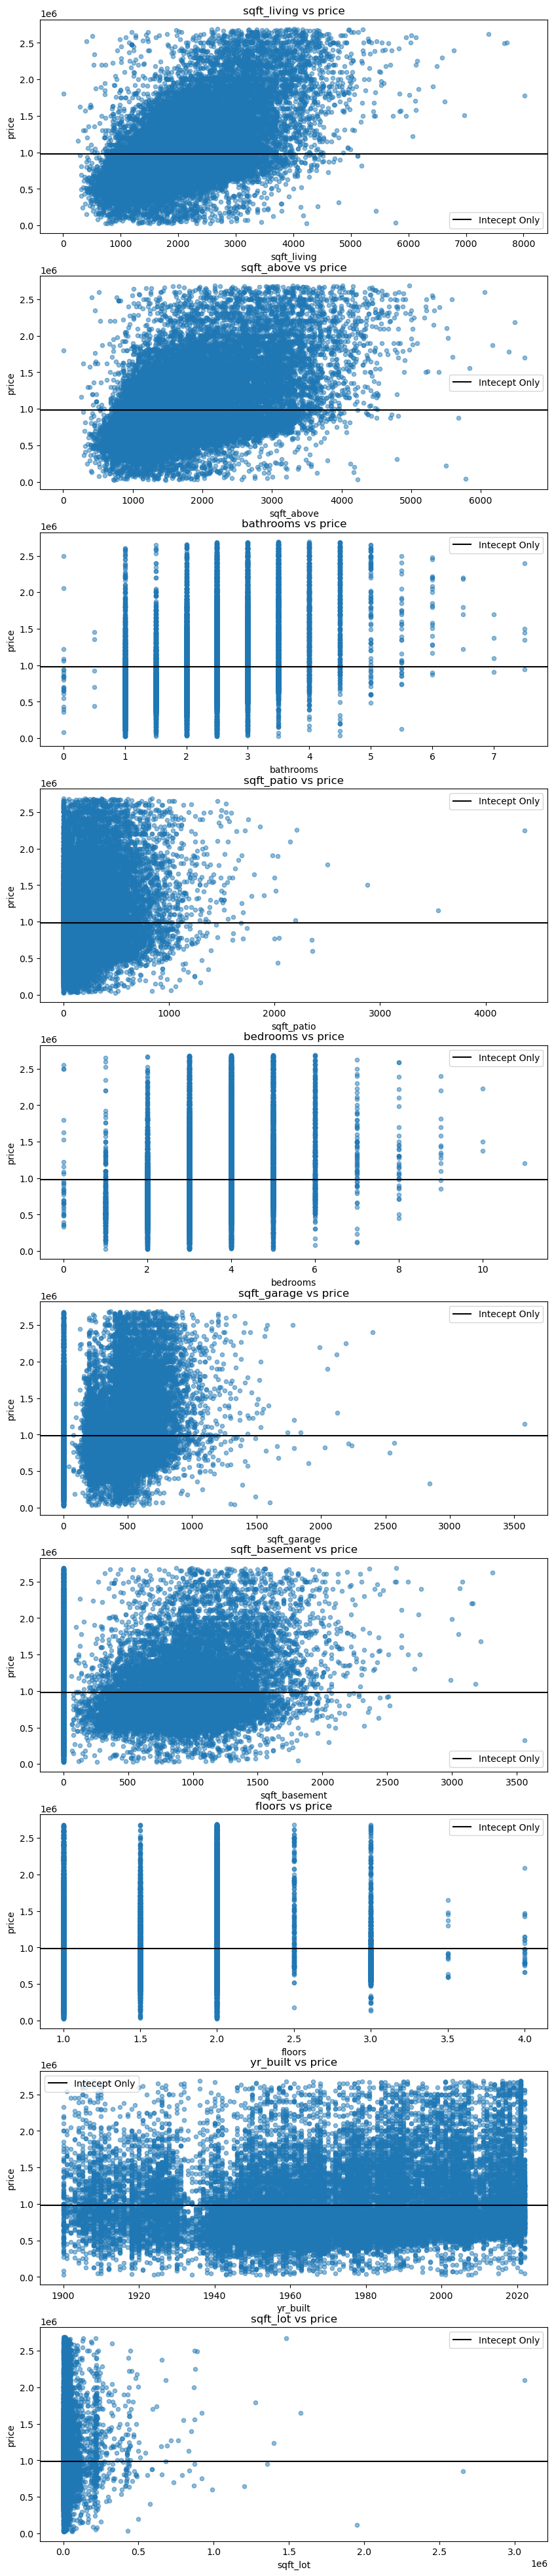

In [16]:
index = 0
models = {}
fig, ax = plt.subplots(len(used_columns), figsize = (10,50))
for column in used_columns:
    df_prepped.plot.scatter(column, 'price', ax = ax[index], alpha = .5)
    ax[index].axhline(df_prepped['price'].mean(), c = 'black', label = 'Intecept Only' )
    ax[index].legend()
  
    ax[index].set_title('{} vs {}'.format(column, 'price'))
    index += 1


R-Squared = 0.3624167843097409
R-Squared = 0.26769988887598606
R-Squared = 0.21385014152784698
R-Squared = 0.06998940151053612
R-Squared = 0.11061678297591038
R-Squared = 0.06714242457282615
R-Squared = 0.045128474125828655
R-Squared = 0.042753965316302156
R-Squared = 0.008228897526841972
R-Squared = 0.006262235597611077
R-Squared = 0.39536275151795064
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1889.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:57:06   Log-Likelihood:            -4.1263e+05
No. Observations:               28897   AIC:                         8.253e+05
Df Residuals:                   28886   BIC:                         8.254e+05
Df Model:    

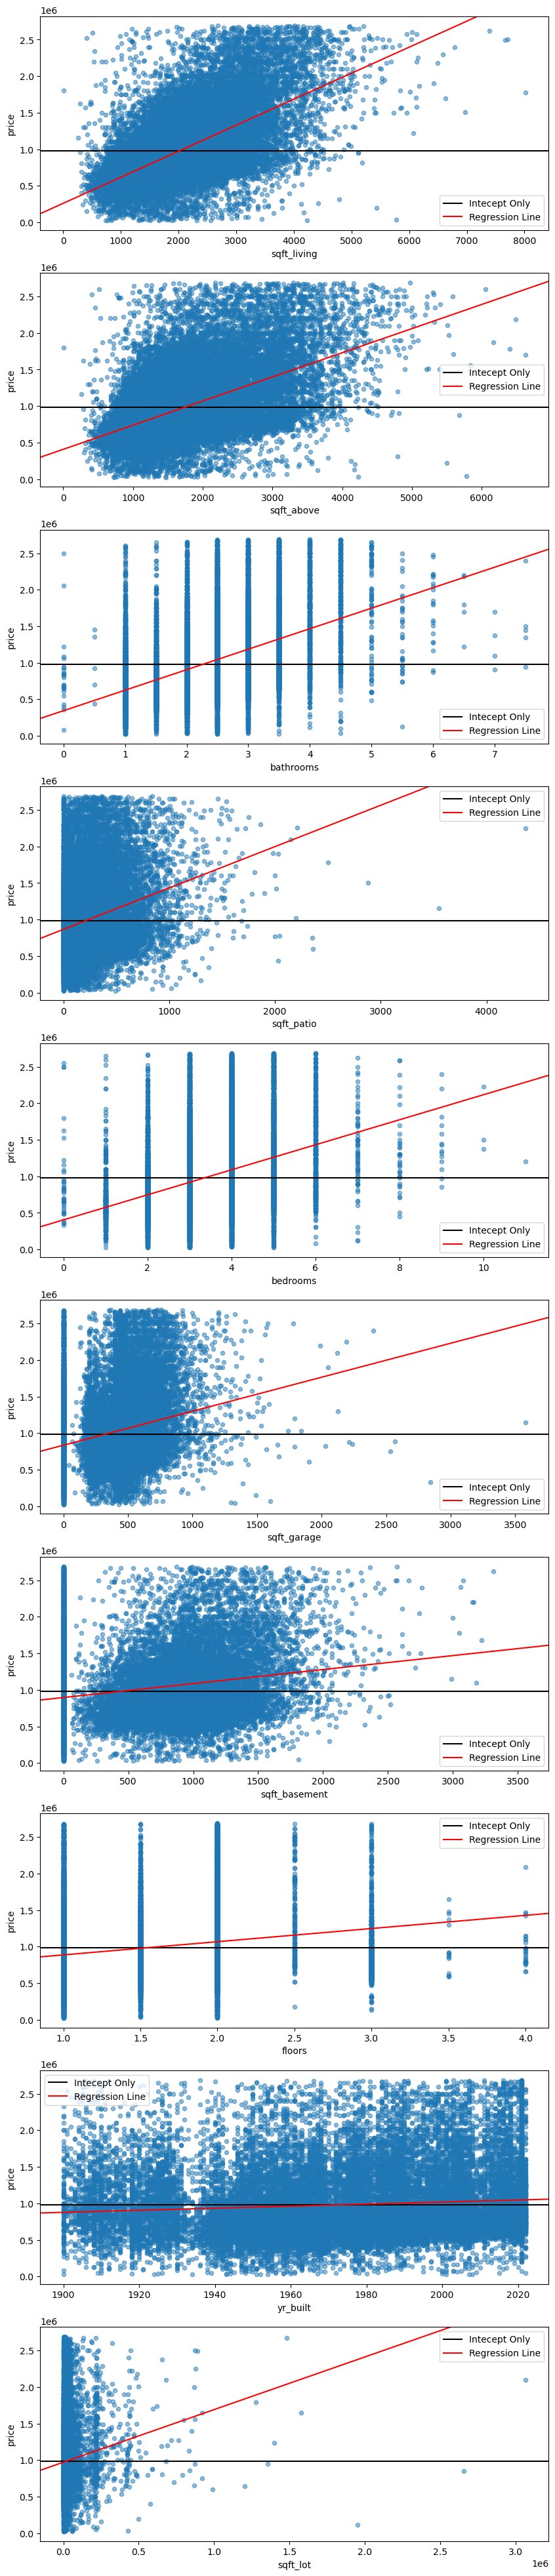

In [5]:
index = 0
models = {}
fig, ax = plt.subplots(len(used_columns), figsize = (10,50))
for column in used_columns:
    models[column] = (helpers.dp.create_model(df_prepped, column, 'price'))
    print('R-Squared = {}'.format(models[column][1].rsquared))
    df_prepped.plot.scatter(column, 'price', ax = ax[index], alpha = .5)
    ax[index].axhline(df_prepped['price'].mean(), c = 'black', label = 'Intecept Only' )
    sm.graphics.abline_plot(model_results= models[column][1] ,label = 'Regression Line', ax = ax[index], c = 'r')
    ax[index].legend()
    index += 1
    
all_model, all_results = helpers.dp.create_model(df_prepped, used_columns, 'price')
print('R-Squared = {}'.format(all_results.rsquared))
print(all_results.summary())


## Conclusion

## Next Steps

First initial look are data frame
The Data Frame columns that will be useful will be price for the dependent y value
Id is just to keep track the house but that is not needed to interpritation
Data should be useful but might give insight to curent economic status
Useful features of a house might be 
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront','nuisance','view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address']

## Data Preperations
**Remove and drop columns and rows with few missing values for the data frame** <br>
**Seperate dateframe in categories and numeric data types** 

In [6]:
prepared_df = helpers.dp.check_and_drop(df)    # Removed dups and missing values
useless_columns = ['id', 'date', 'lat', 'long', 'address']    #Not useful columns
prepared_df.drop(useless_columns, axis= 1, inplace = True)    #Drop useless columns
df_numeric, df_categories = helpers.dp.seperate_dataframe(df)    #Seperate the dataframe from categories and numeric
useful_columns = ['sqft_living','sqft_above','bathrooms','sqft_patio'
                  ,'bedrooms','sqft_garage','sqft_basement']    #Most correlations from these listed columns


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [7]:
model, results = helpers.dp.create_model(df, df_numeric.columns, 'price')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.554e+32
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:57:12   Log-Likelihood:             5.5514e+05
No. Observations:               30111   AIC:                        -1.110e+06
Df Residuals:                   30098   BIC:                        -1.110e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.879e-09   1.24e-09     -4.733